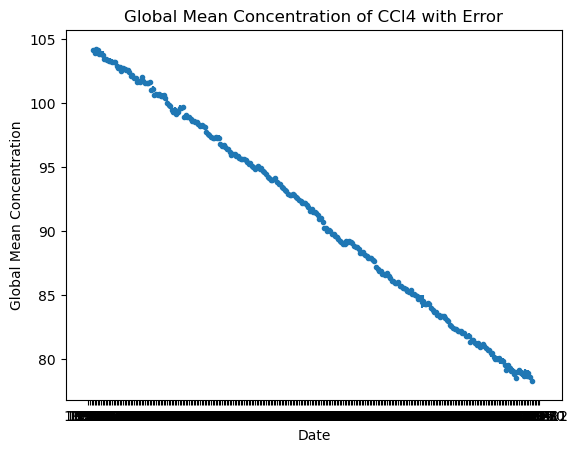

TypeError: can only concatenate str (not "float") to str

In [10]:
# Python DeCal
# HW 8: Curve Fitting and Linear Regression
# Question 2 - Linear Regression

from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#1
data_table = Table.read('global_CCl4_MM.dat', format='ascii')

df = data_table.to_pandas()

df = df[['CCl4ottoyr', 'CCl4ottomon', 'CCl4ottoGLm', 'CCl4ottoGLsd']]

# Renaming columns for clarity
df.columns = ['year', 'month', 'concentration', 'concentration_sd']

df['month'].fillna(1, inplace=True)
df['month'] = df['month'].astype(int)

df['date'] = df['year'].astype(str) + '-' + df['month'].astype(str)


#3
plt.errorbar(df['date'], df['concentration'], yerr=df['concentration_sd'], fmt='o', markersize=3)
plt.xlabel('Date')
plt.ylabel('Global Mean Concentration')
plt.title('Global Mean Concentration of CCl4 with Error')
plt.show()

#4
coefficients = np.polyfit(df['date'], df['concentration'], deg=1)

#5
predicted = np.polyval(coefficients, df['date'])

residuals = df['concentration'] - predicted

residual_variance = np.var(residuals)

N = len(df['date'])
p = 2  
reduced_chi_squared = np.sum(residuals ** 2 / residual_variance) / (N - p)

# 6
print("Parameters:")
print("Slope:", coefficients[0])
print("Intercept:", coefficients[1])
print("Reduced Chi-Squared:", reduced_chi_squared)

#7 
plt.plot(df['date'], residuals, 'o', markersize=3)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [4]:
print(df.head())

   CCl4ottoyr  CCl4ottomon  CCl4ottoNHm  CCl4ottoNHsd  CCl4ottoSHm  \
0        1996            1          NaN           NaN          NaN   
1        1996            2          NaN           NaN          NaN   
2        1996            3          NaN           NaN          NaN   
3        1996            4      105.318         0.197      102.969   
4        1996            5      105.032         0.193      102.754   

   CCl4ottoSHsd  CCl4ottoGLm  CCl4ottoGLsd  
0           NaN          NaN           NaN  
1           NaN          NaN           NaN  
2           NaN          NaN           NaN  
3         0.238      104.144         0.155  
4         0.287      103.893         0.174  
